In [781]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [782]:
expulsion = pd.read_csv("/Users/emiliodulay/Documents/Programming/Student Success Classification/student-success/expulsion24.txt", delimiter='\t')

In [783]:
expulsion.shape

(225157, 21)

In [784]:
expulsion.head()

,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,...,Total Expulsions,Unduplicated Count of Students Expelled (Total),Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),Expulsion Count Violent Incident (No Injury),Expulsion Count Weapons Possession,Expulsion Count Illicit Drug-Related,Expulsion Count Defiance-Only,Expulsion Count Other Reasons
0,2023-24,C,1,NaN,NaN,Alameda,NaN,NaN,All,GF,...,26,25,0,0.0,18,7,0,0,0,1
1,2023-24,C,1,NaN,NaN,Alameda,NaN,NaN,All,GM,...,58,58,0,0.1,19,19,14,6,0,0
2,2023-24,C,1,NaN,NaN,Alameda,NaN,NaN,All,GX,...,0,0,0,0.0,0,0,0,0,0,0
3,2023-24,C,1,NaN,NaN,Alameda,NaN,NaN,All,RA,...,4,4,0,0.0,3,0,1,0,0,0
4,2023-24,C,1,NaN,NaN,Alameda,NaN,NaN,All,RB,...,22,21,0,0.1,14,6,1,0,0,1


In [785]:
df = expulsion[expulsion["AggregateLevel"] == "S"]
df.columns

Index(['AcademicYear', 'AggregateLevel', 'CountyCode', 'DistrictCode',
       'SchoolCode', 'CountyName', 'DistrictName', 'SchoolName', 'CharterYN',
       'ReportingCategory', 'CumulativeEnrollment', 'Total Expulsions',
       'Unduplicated Count of Students Expelled (Total)',
       'Unduplicated Count of Students Expelled (Defiance-Only)',
       'Expulsion Rate (Total)', 'Expulsion Count Violent Incident (Injury)',
       'Expulsion Count Violent Incident (No Injury)',
       'Expulsion Count Weapons Possession',
       'Expulsion Count Illicit Drug-Related', 'Expulsion Count Defiance-Only',
       'Expulsion Count Other Reasons'],
      dtype='object')

In [786]:
df = df.drop(["AcademicYear", "AggregateLevel"], axis = 1).reset_index(drop = True)
df.head()

,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,Total Expulsions,Unduplicated Count of Students Expelled (Total),Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),Expulsion Count Violent Incident (No Injury),Expulsion Count Weapons Possession,Expulsion Count Illicit Drug-Related,Expulsion Count Defiance-Only,Expulsion Count Other Reasons
0,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,GF,67,0,0,0,0.0,0,0,0,0,0,0
1,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,GM,61,0,0,0,0.0,0,0,0,0,0,0
2,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RA,*,*,*,*,*,*,*,*,*,*,*
3,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RB,21,0,0,0,0.0,0,0,0,0,0,0
4,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RD,*,*,*,*,*,*,*,*,*,*,*


In [787]:
df.isnull().sum() # No missing values

CountyCode                                                 0
DistrictCode                                               0
SchoolCode                                                 0
CountyName                                                 0
DistrictName                                               0
SchoolName                                                 0
CharterYN                                                  0
ReportingCategory                                          0
CumulativeEnrollment                                       0
Total Expulsions                                           0
Unduplicated Count of Students Expelled (Total)            0
Unduplicated Count of Students Expelled (Defiance-Only)    0
Expulsion Rate (Total)                                     0
Expulsion Count Violent Incident (Injury)                  0
Expulsion Count Violent Incident (No Injury)               0
Expulsion Count Weapons Possession                         0
Expulsion Count Illicit 

In [788]:
df.dtypes

CountyCode                                                   int64
DistrictCode                                               float64
SchoolCode                                                 float64
CountyName                                                  object
DistrictName                                                object
SchoolName                                                  object
CharterYN                                                   object
ReportingCategory                                           object
CumulativeEnrollment                                        object
Total Expulsions                                            object
Unduplicated Count of Students Expelled (Total)             object
Unduplicated Count of Students Expelled (Defiance-Only)     object
Expulsion Rate (Total)                                      object
Expulsion Count Violent Incident (Injury)                   object
Expulsion Count Violent Incident (No Injury)                ob

In [789]:
df.head()

,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,Total Expulsions,Unduplicated Count of Students Expelled (Total),Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),Expulsion Count Violent Incident (No Injury),Expulsion Count Weapons Possession,Expulsion Count Illicit Drug-Related,Expulsion Count Defiance-Only,Expulsion Count Other Reasons
0,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,GF,67,0,0,0,0.0,0,0,0,0,0,0
1,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,GM,61,0,0,0,0.0,0,0,0,0,0,0
2,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RA,*,*,*,*,*,*,*,*,*,*,*
3,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RB,21,0,0,0,0.0,0,0,0,0,0,0
4,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RD,*,*,*,*,*,*,*,*,*,*,*


In [790]:
df.columns.tolist()

['CountyCode',
 'DistrictCode',
 'SchoolCode',
 'CountyName',
 'DistrictName',
 'SchoolName',
 'CharterYN',
 'ReportingCategory',
 'CumulativeEnrollment',
 'Total Expulsions',
 'Unduplicated Count of Students Expelled (Total)',
 'Unduplicated Count of Students Expelled (Defiance-Only)',
 'Expulsion Rate (Total)',
 'Expulsion Count Violent Incident (Injury)',
 'Expulsion Count Violent Incident (No Injury)',
 'Expulsion Count Weapons Possession',
 'Expulsion Count Illicit Drug-Related',
 'Expulsion Count Defiance-Only',
 'Expulsion Count Other Reasons']

In [791]:
df.rename(columns={
    "ReportingCategory" : "Demographic",
    "CumulativeEnrollment" : "Enrollment Total",
    "Total Expulsions" : "Expulsions Total",
    "Unduplicated Count of Students Expelled (Total)" : "Unduplicated Expulsion Total",
    "Unduplicated Count of Students Expelled (Defiance-Only)" : "Unduplicated Defiance",
    "Expulsion Count Violent Incident (Injury)" : "Violent-Injury",
    "Expulsion Count Violent Incident (No Injury)" : "Violent-No Injury",
    "Expulsion Count Weapons Possession" : "Weapon Possession",
    "Expulsion Count Illicit Drug-Related" : "Drug",
    "Expulsion Count Defiance-Only" : "Defiance",
    "Expulsion Count Other Reasons" : "Other"
}, inplace = True)


df.head()

,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,Demographic,Enrollment Total,Expulsions Total,Unduplicated Expulsion Total,Unduplicated Defiance,Expulsion Rate (Total),Violent-Injury,Violent-No Injury,Weapon Possession,Drug,Defiance,Other
0,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,GF,67,0,0,0,0.0,0,0,0,0,0,0
1,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,GM,61,0,0,0,0.0,0,0,0,0,0,0
2,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RA,*,*,*,*,*,*,*,*,*,*,*
3,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RB,21,0,0,0,0.0,0,0,0,0,0,0
4,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RD,*,*,*,*,*,*,*,*,*,*,*


In [792]:
# Cast to numeric type
cols = ["Enrollment Total", 
        "Expulsions Total",
        "Unduplicated Expulsion Total",
        "Unduplicated Defiance",
        "Expulsion Rate (Total)", 
        "Violent-Injury",
        "Violent-No Injury",
        "Weapon Possession",
        "Drug",
        "Defiance",
        "Other"]

df[cols] = df[cols].apply(pd.to_numeric, errors = 'coerce')

df['Expulsions Total'].unique()
df.head()

,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,Demographic,Enrollment Total,Expulsions Total,Unduplicated Expulsion Total,Unduplicated Defiance,Expulsion Rate (Total),Violent-Injury,Violent-No Injury,Weapon Possession,Drug,Defiance,Other
0,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,GF,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,GM,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RB,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [793]:
# Convert Charter Status to Numeric. No : 0, Yes : 1
df['CharterYN'] = df['CharterYN'].map({"No " : 0, 
                     "Yes" : 1})
df.head()

,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,Demographic,Enrollment Total,Expulsions Total,Unduplicated Expulsion Total,Unduplicated Defiance,Expulsion Rate (Total),Violent-Injury,Violent-No Injury,Weapon Possession,Drug,Defiance,Other
0,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,0,GF,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,0,GM,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,0,RA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,0,RB,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,0,RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [794]:

df["Demographic"] = df['Demographic'].map({"RB" : "African American",
                                            "RI" : "Native American",
                                            "RA" : "Asian",
                                            "RH" : "Latino",
                                            "RF" : "Filipino",
                                            "RD" : "Not Reported", 
                                            "RP" : "Pacific Islander",
                                            "RT" : "Multple",
                                            "RW" : "White",
                                            "GM" : "Male",
                                            "GF" : "Female",
                                            "GX" : "Non-Binary",
                                            "GZ" : "Missing Gender",
                                            "SE" : "English Learners",
                                            "SD" : "Disabilities",
                                            "SS" : "Socioecon Disad",
                                            "SM" : "Migraant",
                                            "SF" : "Foster",
                                            "SH" : "Homeless",
                                            "TA" : "Total"
                                            })

df.head()

,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,Demographic,Enrollment Total,Expulsions Total,Unduplicated Expulsion Total,Unduplicated Defiance,Expulsion Rate (Total),Violent-Injury,Violent-No Injury,Weapon Possession,Drug,Defiance,Other
0,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,0,Female,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,0,Male,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,0,Asian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,0,African American,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,0,Not Reported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [795]:
df.isnull().sum()

CountyCode                          0
DistrictCode                        0
SchoolCode                          0
CountyName                          0
DistrictName                        0
SchoolName                          0
CharterYN                           0
Demographic                         0
Enrollment Total                72734
Expulsions Total                72734
Unduplicated Expulsion Total    72734
Unduplicated Defiance           72734
Expulsion Rate (Total)          72734
Violent-Injury                  72734
Violent-No Injury               72734
Weapon Possession               72734
Drug                            72734
Defiance                        72734
Other                           72734
dtype: int64

# Data Analysis - Exploration and Summary Statistics

In [796]:
# Number of Counties - 58
len(df['CountyCode'].unique())
len(df["CountyName"].unique())

# Number of Districts - 
len(df["DistrictCode"].unique()) # 1017
len(df["DistrictName"].unique()) # 1006
# The fact that DistName < DistCode implies some district names have multiple district codes. 
# For this reason, it will be better to use District Code in order to be more precise.

# Number of Charter Schools - 
df[df["CharterYN"] == 1].shape[0] # 21650
df[df["CharterYN"] == 0].shape[0] #159145


159145

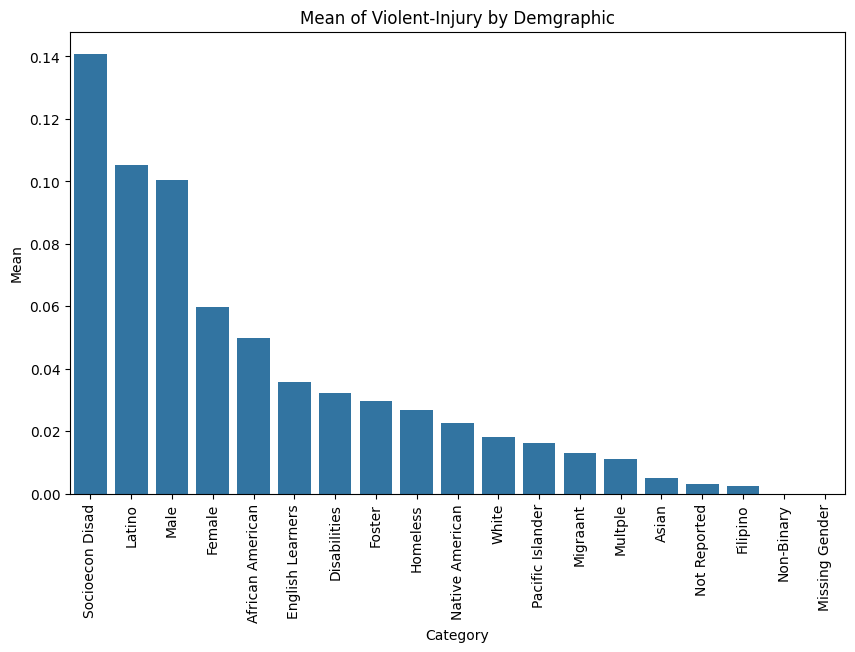

In [797]:
grouped = df.groupby("Demographic")["Violent-Injury"].describe()
sorted = grouped.sort_values(by="mean", ascending = False)
sorted = sorted.iloc[1:] # Exclude "Total" as a category

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted.index, y=sorted["mean"])
plt.title("Mean of Violent-Injury by Demgraphic")
plt.xlabel("Category")
plt.ylabel("Mean")
plt.xticks(rotation=90)
plt.show()



In [798]:
df[df["Demographic"] == "Female"]["Violent-Injury"].describe()

count    9862.000000
mean        0.059826
std         0.407901
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        15.000000
Name: Violent-Injury, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

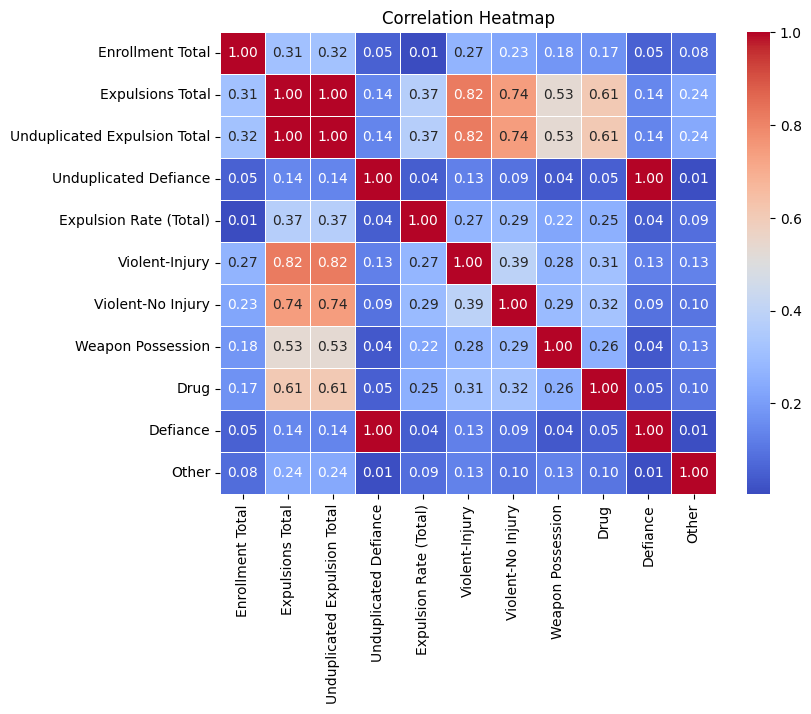

In [799]:
# Correlation matrix: Corrleation between different kinds of expulsion:

explusion_df = df.iloc[:,8:]
exp_corr_mat = explusion_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(exp_corr_mat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")

# ML Models

In [800]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score


In [801]:
df.head()

,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,Demographic,Enrollment Total,Expulsions Total,Unduplicated Expulsion Total,Unduplicated Defiance,Expulsion Rate (Total),Violent-Injury,Violent-No Injury,Weapon Possession,Drug,Defiance,Other
0,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,0,Female,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,0,Male,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,0,Asian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,0,African American,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,0,Not Reported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Random Forest Implementaiton

### classify student demographics as a function of school district code, school code, charter status, and expulsion incident

Accuracy: 0.09

Classification Report:
                   precision    recall  f1-score   support

African American       0.04      0.05      0.05      2076
           Asian       0.05      0.04      0.04      2199
    Disabilities       0.22      0.26      0.24      2078
English Learners       0.12      0.11      0.12      2011
          Female       0.10      0.12      0.11      2075
        Filipino       0.03      0.03      0.03      2092
          Foster       0.02      0.02      0.02      1644
        Homeless       0.10      0.09      0.10      1861
          Latino       0.08      0.08      0.08      2120
            Male       0.10      0.10      0.10      2118
        Migraant       0.03      0.03      0.03       618
         Multple       0.09      0.08      0.08      2163
 Native American       0.00      0.01      0.01      2090
      Non-Binary       0.00      0.00      0.00       461
    Not Reported       0.02      0.02      0.02      2106
Pacific Islander       0.00    

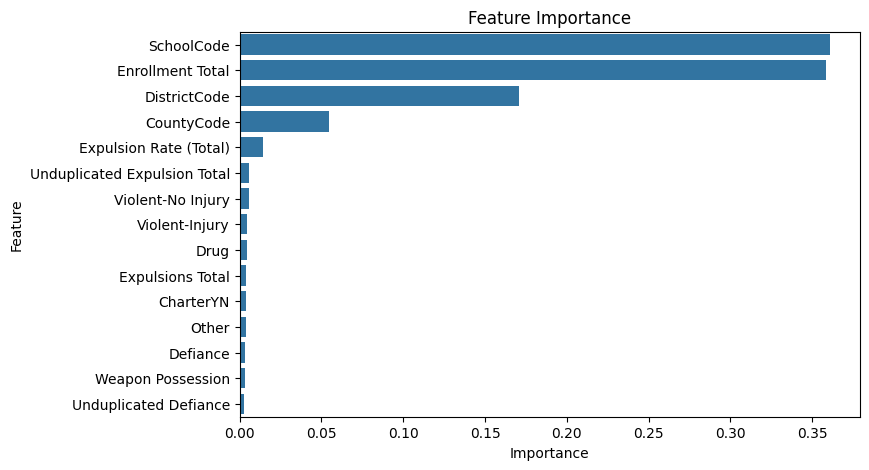

In [802]:
y = df["Demographic"] # target
X = df.drop(["CountyName", "DistrictName", "SchoolName", "Demographic"], axis= 1) # features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Train and Split

# Initialize model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Get feature importances
feature_importance = rf_classifier.feature_importances_

# Convert to a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"])
plt.title("Feature Importance")
plt.show()

